# Report Weather Analysis
***

![weatherclouds](https://cdn.pixabay.com/photo/2024/02/12/21/34/sunset-8569636_1280.jpg)

## Description:
***

This Jupyter Notebook provides a concise report outlining how several tasks are accomplished using Code Space, Linux shell commands, bash scripting and Python (Pandas) for data analysis.

It includes brief explanations of the tasks and the commands used to achieve their objective. The tasks focus on training skills such as create directory structrue, handling timestamps, fetching web data and automating workflows.


## Task Breakdown and Commands Usage
***

First of all create a respository in Github , once inside the repository open **Codespaces** directly from Github.

### Task 1: Create Directory Structure

Using the command line, create a directory (that is, a folder) named data at the root of your repository. Inside data, create two subdirectories: timestamps and weather.

Linux command used in Code space:

In [ ]:
# Navigate to the root of repository
cd
# Create a directory named data
mkdir data
# Go into the data directory
cd data
# Inside create two other subdirectories: timestamps and weather
mkdir timestamps weather

In [ ]:
# Delete directories
rmdir namedirectory

### Task 2: Timestamps

Navigate to the data/timestamps directory. Use the date command to output the current date and time, appending the output to a file named now.txt. Make sure to use the >> operator to append (not overwrite) the file. Repeat this step ten times, then use the more command to verify that now.txt has the expected content.

commands and steps are:

In [ ]:
# navigate to directory
cd data/timestamps

# Append the date and time to now.txt (Repeat 10 times)
date >> now.txt

# Verify the content of now.txt
more now.txt






### Task 3: Formatting Timestamps
Run the date command again, but this time format the output using YYYYmmdd_HHMMSS (e.g., 20261114_130003 for 1:00:03 PM on November 14, 2026). Refer to the date man page (using man date) for more formatting options. (Press q to exit the man page). Append the formatted output to a file named formatted.txt.

### Task 4: Create Timestamped Files
Use the touch command to create an empty file with a name in the YYYYmmdd_HHMMSS.txt format. You can achieve this by embedding your date command in backticks ` into the touch command. You should no longer use redirection (>>) in this step.

### Task 5: Download Today's Weather Data
Change to the data/weather directory. Download the latest weather data for the Athenry weather station from Met Eireann using wget. Use the -O <filename> option to save the file as weather.json. The data can be found at this URL:
https://prodapi.metweb.ie/observations/athenry/today.

### Task 6: Timestamp the Data
Modify the command from Task 5 to save the downloaded file with a timestamped name in the format YYYYmmdd_HHMMSS.json.

### Task 7: Write the Script
Write a bash script called weather.sh in the root of your repository. This script should automate the process from Task 6, saving the weather dat

## Importing libraries
***


In [3]:
# Data frames
import pandas as pd
# Importing matplotlib for Plotting
import matplotlib.pyplot as plt

## Analysing the Data
***


In [4]:
# Read the data
df = pd.read_json('data/weather/20241201_185727_athenry.json')

In [5]:
# show the data
df.head()

,name,temperature,symbol,weatherDescription,text,windSpeed,windGust,cardinalWindDirection,windDirection,humidity,rainfall,pressure,dayName,date,reportTime
0,Athenry,11,02n,Fair,"""Fair""",9,-,S,180,91,0.0,1006,Sunday,2024-01-12,00:00
1,Athenry,11,02n,Fair,"""Fair""",13,-,S,180,90,0.0,1006,Sunday,2024-01-12,01:00
2,Athenry,11,02n,Fair,"""Fair""",11,-,S,180,90,0.0,1005,Sunday,2024-01-12,02:00
3,Athenry,11,04n,Cloudy,"""Cloudy""",7,-,S,180,92,0.0,1005,Sunday,2024-01-12,03:00
4,Athenry,11,04n,Cloudy,"""Cloudy""",9,-,S,180,94,0.1,1005,Sunday,2024-01-12,04:00


In [6]:
# Information about the columns and types of variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   name                   19 non-null     object        
 1   temperature            19 non-null     int64         
 2   symbol                 19 non-null     object        
 3   weatherDescription     19 non-null     object        
 4   text                   19 non-null     object        
 5   windSpeed              19 non-null     int64         
 6   windGust               19 non-null     object        
 7   cardinalWindDirection  19 non-null     object        
 8   windDirection          19 non-null     int64         
 9   humidity               19 non-null     int64         
 10  rainfall               19 non-null     float64       
 11  pressure               19 non-null     int64         
 12  dayName                19 non-null     object        
 13  date   

## Data visualization
***


Once the data frame is uploaded, the analysis can proceed. The analysis focuses on data collected hourly for the current day, December 1st, from the station located in Athenry, Galway. This data is published by Met Éireann and registered on [data.gov.ie.](https://data.gov.ie/)

#### Temperature throughout the day

The following plot shows how the temperature developed during the hours on 1st December. The maximum temperature reached is 11°C and gradually dropped a few degrees in the afternoon, reaching 9°C. The tempeture remained relatively mild and stable during the day with minimal variation.

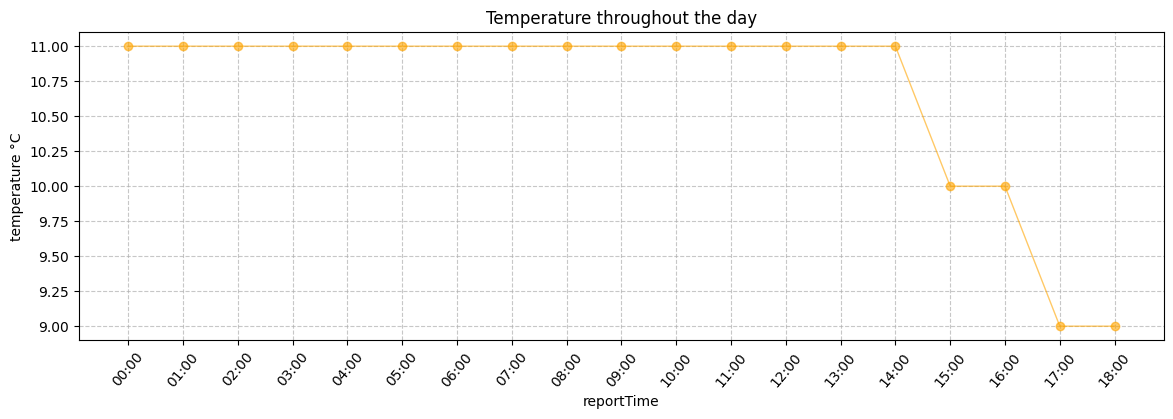

In [7]:
# Plotting Temperature throughout the day
plt.figure(figsize=(14, 4))
plt.plot(df['reportTime'], df['temperature'], color="orange", linestyle="-", linewidth="1", marker="o", alpha=0.6)

plt.xlabel("reportTime")
plt.ylabel("temperature °C")
plt.title("Temperature throughout the day")

plt.xticks(rotation=50)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

#### Humidity by hour

This plot shows the % Relative Humidity throughout the day as defined by [Met Eirean](https://www.met.ie/forecast-explained/). The level of Humidity is high between 80%-100%, fully saturated with moisture, often leading precipitation. Also, It has not meaningful variation in just one day.



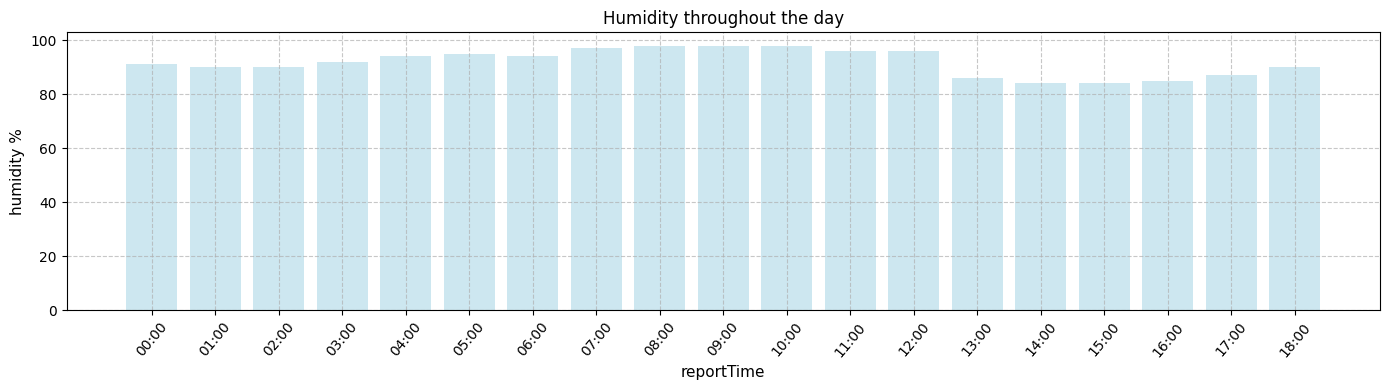

In [8]:
# Plotting the level of Humidity by hour 
plt.figure(figsize=(14, 4))
plt.bar(df['reportTime'], df['humidity'], color="lightblue", alpha=0.6)

plt.xlabel("reportTime",fontsize=11)
plt.ylabel("humidity %", fontsize=11)
plt.title("Humidity throughout the day", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation= 50)
plt.tight_layout()
plt.show()


#### Hourly Wind speed variation

In this plot, we can observe the wind speed in Km/h. The wind speed is quite low and here is not significant variation due wind speed is between 6km/h and 17km/h.

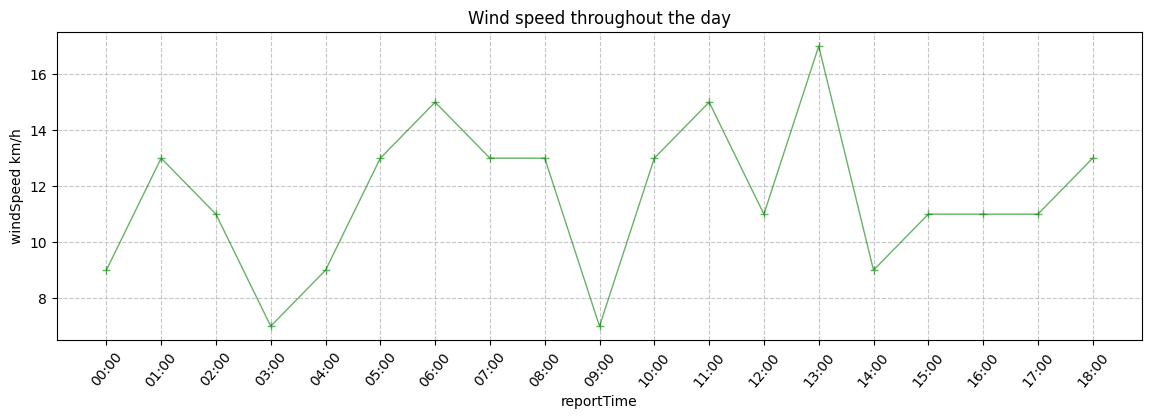

In [9]:
# Plotting the wind speed throughout the day
plt.figure(figsize=(14, 4))
plt.plot(df['reportTime'], df['windSpeed'], color="green", linestyle="-", linewidth="1", marker="+", alpha=0.6)

plt.xlabel("reportTime")
plt.ylabel("windSpeed km/h")
plt.title("Wind speed throughout the day")

plt.xticks(rotation=50)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

#### Wind Direction

The following bar chart and pie chart highlights the wind direction based on the cardinal points. The wind predominantly blows towards the South West and West with a slightly less frequency towards the South.

In [10]:
df['cardinalWindDirection'].value_counts()

cardinalWindDirection
SW    7
W     7
S     5
Name: count, dtype: int64

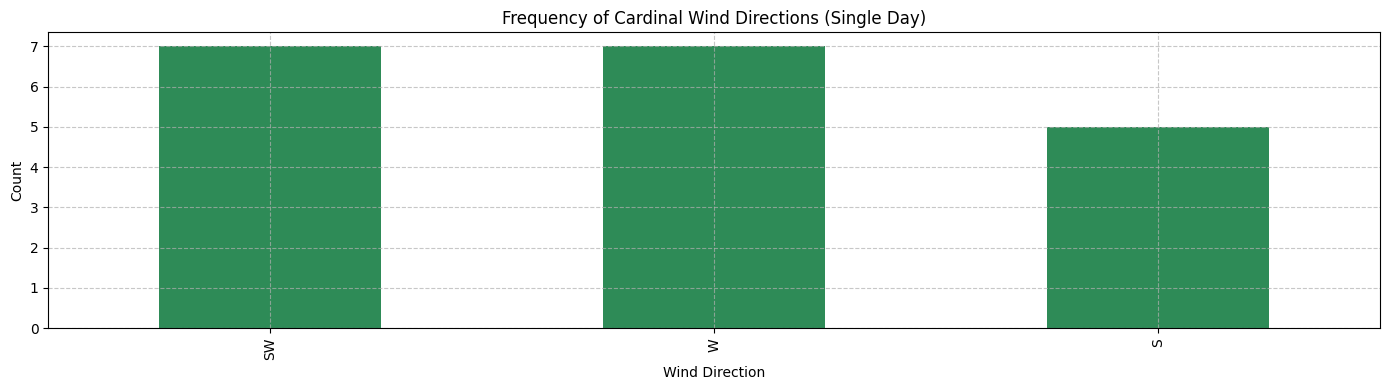

In [11]:
# Plotting a bar chart about the frequency of cardinal wind directions
plt.figure(figsize=(14, 4))
df['cardinalWindDirection'].value_counts().plot(kind='bar', color='seagreen')
plt.title('Frequency of Cardinal Wind Directions (Single Day)')
plt.xlabel('Wind Direction')
plt.ylabel('Count')
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

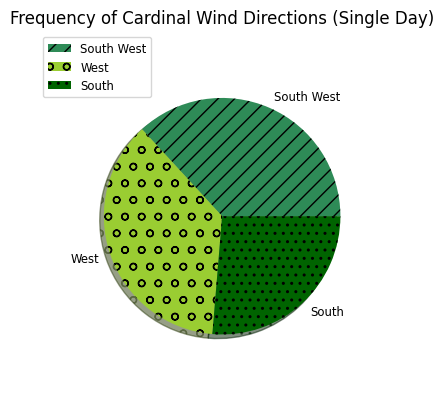

In [12]:
# Plotting a pie chart about the frequency of cardinal wind directions
labels = 'South West', 'West', 'South'
sizes = [7, 7, 5]
colors=['seagreen','yellowgreen','darkgreen']
hatch_patterns= ['//', 'o','..']
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, colors=colors, hatch=hatch_patterns, shadow=True,  textprops={'size': 'smaller'}, radius=0.8)
plt.title('Frequency of Cardinal Wind Directions (Single Day)')
plt.legend(labels, loc="best", fontsize="small")
plt.show

***
### End